In [39]:
import pandas as pd

In [41]:
df=pd.read_csv("employee_survey_data.csv")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [45]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [47]:
df.tail()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0
4409,4410,1.0,3.0,3.0


In [49]:
df.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.725170,2.729478,2.763492
std,1273.201673,1.089852,1.098904,0.703541
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


In [51]:
df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

In [53]:
df.loc[df["EmployeeID"]==4410]

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
4409,4410,1.0,3.0,3.0


In [55]:
df.loc[df["EmployeeID"]==5]

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
4,5,4.0,1.0,3.0


In [57]:
df.shape

(4410, 4)

In [59]:
df.iloc[8]

EmployeeID                 9.0
EnvironmentSatisfaction    2.0
JobSatisfaction            4.0
WorkLifeBalance            3.0
Name: 8, dtype: float64

In [61]:
df.iloc[1306]

EmployeeID                 1307.0
EnvironmentSatisfaction       2.0
JobSatisfaction               3.0
WorkLifeBalance               3.0
Name: 1306, dtype: float64

In [63]:
df.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [65]:
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].fillna(df["EnvironmentSatisfaction"].median())

In [67]:
df["JobSatisfaction"] = df["JobSatisfaction"].fillna(df["JobSatisfaction"].median())

In [69]:
df["WorkLifeBalance"] = df["WorkLifeBalance"].fillna(df["WorkLifeBalance"].median())

In [71]:
df.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [75]:
numeric_cols=df.select_dtypes(include="number").columns

<Axes: xlabel='EnvironmentSatisfaction', ylabel='Count'>

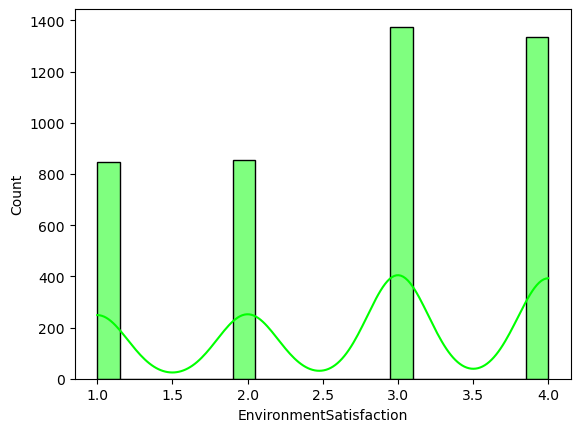

In [77]:
sns.histplot(df["EnvironmentSatisfaction"],bins=20,kde=True,color="lime")

<Axes: xlabel='JobSatisfaction', ylabel='Count'>

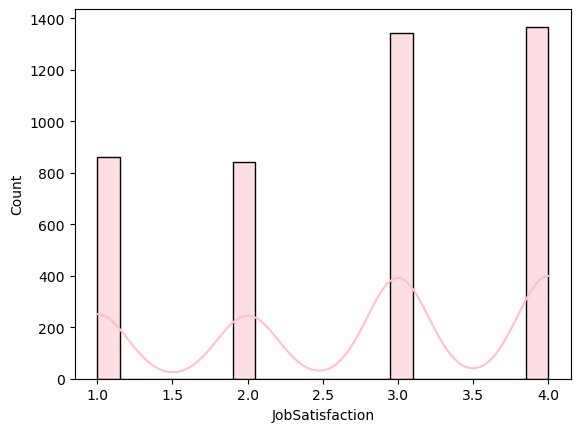

In [78]:
sns.histplot(df["JobSatisfaction"],bins=20,kde=True,color="pink")

<Axes: xlabel='WorkLifeBalance', ylabel='Count'>

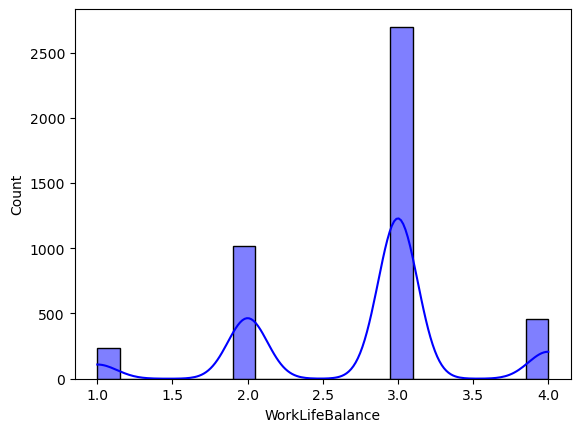

In [79]:
sns.histplot(df["WorkLifeBalance"],bins=20,kde=True,color="blue")

In [81]:
columns=['EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']
for col in columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_bound=Q1-1.5*IQR
    Upper_bound=Q3+1.5*IQR
    outliers=df[(df[col] < Lower_bound) | (df[col] > Upper_bound)]
    print(outliers.shape[0])

0
0
0


In [82]:
df.to_csv("employee_krizzz_clean.csv",index=False)